<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png"> </src>

source: sklearn library documentation

Last time used cross_val_score
- nice helper function to take care of k fold validation
    + When creating folds keeps tries to maintain distribution of the classes 

There will be situation when you want to maintain your own cross validation

Let see KFold

In [1]:
from sklearn.model_selection import KFold
import numpy as np

In [2]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)


In [7]:
X= np.arange(50)**2

In [8]:
for train_index, val_index in kfold.split(X):
    print(train_index, val_index)
    print(len(train_index), len(val_index))
    print('data')
    print(X[train_index])

[ 0  1  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 28 30 32 33 34 36 37 39 41 42 43 44 45 47 49] [ 2  3 27 29 31 35 38 40 46 48]
40 10
data
[   0    1   16   25   36   49   64   81  100  121  144  169  196  225
  256  289  324  361  400  441  484  529  576  625  676  784  900 1024
 1089 1156 1296 1369 1521 1681 1764 1849 1936 2025 2209 2401]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 20 23 24 25 27 28
 29 30 31 33 34 35 37 38 40 41 43 44 45 46 47 48] [13 19 21 22 26 32 36 39 42 49]
40 10
data
[   0    1    4    9   16   25   36   49   64   81  100  121  144  196
  225  256  289  324  400  529  576  625  729  784  841  900  961 1089
 1156 1225 1369 1444 1600 1681 1849 1936 2025 2116 2209 2304]
[ 0  1  2  3  5  6  7  8  9 11 12 13 15 16 18 19 20 21 22 25 26 27 28 29
 31 32 34 35 36 37 38 39 40 42 43 44 46 47 48 49] [ 4 10 14 17 23 24 30 33 41 45]
40 10
data
[   0    1    4    9   25   36   49   64   81  121  144  169  225  256
  324  361  400  441  4

In [9]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [10]:
data = load_iris()
X= data.data
y = data.target
print(X[0:4,:])
print(y[0:4])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]
[0 0 0 0]


In [11]:
lr=  LogisticRegression()

In [13]:
lr.fit(X, y)

/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
for train_index, val_index in kfold.split(X):
    lr.fit(X[train_index], y[train_index])
    print(lr.score(X[val_index], y[val_index]))


0.8333333333333334
0.9333333333333333
0.9666666666666667
0.9666666666666667
1.0


/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be cha

Checkout this link for all the available iterators
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

# Stratified K Folds

It preserves class percentages in the folds

In [15]:
from sklearn.model_selection import StratifiedKFold

In [18]:
X = np.array([2*i for i in range(10)] + [2*i +1 for i in range(20)])
X

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18,  1,  3,  5,  7,  9, 11, 13,
       15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39])

In [19]:
y = np.array([0]*10 + [1]*20)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
skflod = StratifiedKFold(n_splits=5, shuffle=True, random_state=1 )

In [21]:
for train_index, val_index in skflod.split(X,y):
    print(train_index, val_index)

[ 0  1  3  4  5  6  7  8 10 11 12 14 15 17 18 19 21 22 23 24 25 27 28 29] [ 2  9 13 16 20 26]
[ 0  1  2  3  5  7  8  9 10 11 13 15 16 17 18 19 20 21 22 23 25 26 28 29] [ 4  6 12 14 24 27]
[ 1  2  4  5  6  7  8  9 12 13 14 15 16 18 19 20 21 22 24 25 26 27 28 29] [ 0  3 10 11 17 23]
[ 0  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24 26 27] [ 1  7 19 25 28 29]
[ 0  1  2  3  4  6  7  9 10 11 12 13 14 16 17 19 20 23 24 25 26 27 28 29] [ 5  8 15 18 21 22]


# Sampling and Bootstrap

Don't split training data. They sample data using different techniques

In [26]:
## ?? Can you create a bootstrap code
        
def bootstrap_gen(n, fold =5, random_state= None):
    '''
    n: max index
    return bs, out_bs
    '''
    for _ in range(fold):
        bs = np.random.randint(0, n, n)
        out_bs = set(range(n)) - set(bs)
        yield bs , out_bs
    
    

In [27]:
bs_sample_gen = bootstrap_gen(10)
for bs_, out_bs_ in bs_sample_gen:
    print(bs_)
    print(out_bs_)

[4 0 9 0 7 1 3 4 1 1]
{8, 2, 5, 6}
[8 3 7 8 9 9 1 5 5 7]
{0, 2, 4, 6}
[6 9 0 0 6 7 9 1 8 7]
{2, 3, 4, 5}
[0 3 6 0 3 0 4 6 5 5]
{8, 1, 2, 9, 7}
[6 7 5 0 7 1 7 5 8 6]
{9, 2, 3, 4}


# Hyper parameter optimization

some of the parameters of the model are not learned by the machine, called hyper-parameters. They require manual tunning.

In [28]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits 
from sklearn.model_selection import GridSearchCV

In [29]:
digit = load_digits()

In [30]:
X,y = digit.data, digit.target

In [31]:
X.shape

(1797, 64)

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

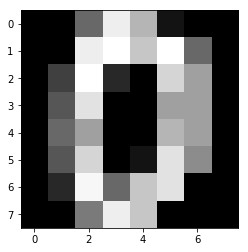

In [35]:
plt.imshow(X[0].reshape(8,8), cmap= plt.cm.Greys_r)

In [36]:
hyper_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [39]:
import os

In [40]:
os.cpu_count()

8

In [41]:
clf = GridSearchCV(SVC(), hyper_parameters, scoring='accuracy', cv =5,n_jobs= -1 )

In [42]:
%timeit clf.fit(X,y)

1.79 s ± 7.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
clf.cv_results_.keys()

dict_keys(['split2_train_score', 'split3_test_score', 'param_kernel', 'split4_test_score', 'split1_train_score', 'split1_test_score', 'std_test_score', 'std_fit_time', 'params', 'mean_train_score', 'split0_train_score', 'std_train_score', 'std_score_time', 'split3_train_score', 'param_gamma', 'split4_train_score', 'mean_score_time', 'split2_test_score', 'param_C', 'mean_fit_time', 'split0_test_score', 'rank_test_score', 'mean_test_score'])

In [46]:
clf.cv_results_['mean_test_score']

array([0.97161937, 0.9476906 , 0.97273233, 0.95937674, 0.97273233,
       0.96271564, 0.97273233, 0.96271564, 0.94936004, 0.94936004,
       0.94936004, 0.94936004])

In [48]:
clf.cv_results_['rank_test_score']

array([ 4, 12,  1,  7,  1,  5,  1,  5,  8,  8,  8,  8], dtype=int32)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Custom scoring/loss functions

In [1]:
from sklearn.metrics import make_scorer

In [ ]:
from sklearn.preprocessing import LabelBinarizer
def log_loss(p_true, p_pred, class_weight = (1,7), cost_multiplier= 2, es=1e-15):
    p_pred_modified = np.clip(p_pred,es, 1-es )
    lb = LabelBinarizer()
    p_true = lb.fit_transform(p_true)
    loss= -np.sum(np.log(p_pred_modified)*p_true)
    return loss/len(p_true)
    
    